In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import glob
import os
from pandas.core.common import flatten
from PIL import Image

# Generate Figure 17 (t-SNE visualization of diffusion model generated images)

Files already downloaded and verified
image_path example:  data/cifar-10-ddpm/airplane/s_airplane_00258.jpg
class example:  airplane
data size: 5120


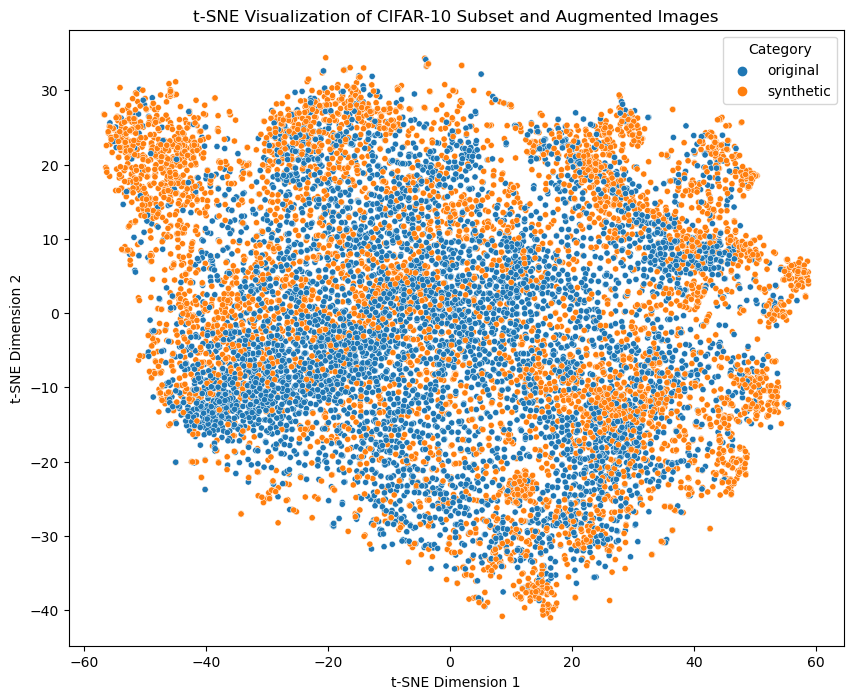

In [13]:
# Download CIFAR-10 dataset and select a subset of 5000 images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

cifar_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
subset_indices = torch.randperm(len(cifar_dataset))[:5000]
subset_dataset = torch.utils.data.Subset(cifar_dataset, subset_indices)

# Load the data and class labels for the original subset
data_loader_subset = torch.utils.data.DataLoader(subset_dataset, batch_size=64, shuffle=False)
X_subset = []
y_subset = []
for images, labels in data_loader_subset:
    X_subset.extend(images.view(images.size(0), -1))
    y_subset.extend(labels)

# Load your augmented images and labels (replace this with your augmented data loading)
# You should have X_augmented and y_augmented
data_path = 'data/cifar-10-ddpm'

#1.
# get all the paths from train_data_path and append image paths and class to to respective lists
# eg. train path-> 'images/train/26.Pont_du_Gard/4321ee6695c23c7b.jpg'
# eg. class -> 26.Pont_du_Gard
image_paths = [] #to store image paths in list
classes = [] #to store class values
for i_data_path in glob.glob(data_path + '/*'):
    if (os.path.isdir(i_data_path) and i_data_path.split('/')[-1] != 'batch_previews'):
        classes.append(i_data_path.split('/')[-1]) 
        image_paths.append(glob.glob(i_data_path + '/*'))
image_paths = list(flatten(image_paths))

print('image_path example: ', image_paths[0])
print('class example: ', classes[0])

print("data size: {}".format(len(image_paths)))

#######################################################
#      Create dictionary for class indexes
#######################################################
idx_to_class = {i:j for i, j in enumerate(classes)}
class_to_idx = {value:key for key,value in idx_to_class.items()}

#######################################################
#               Define Dataset Class
#######################################################
class SyntheticCifarDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, transform=False):
        self.image_paths = image_paths
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        # image = cv2.imread(image_filepath)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image=Image.open(image_filepath)

        label = image_filepath.split('/')[-2]
        label = class_to_idx[label]
        if self.transform is not None:
            image = self.transform(img=image)#["image"]
        
        return image, label

#######################################################
#                  Create Dataset
#######################################################
full_trainset = SyntheticCifarDataset(image_paths, transform)
#######################################################
#                  Define Dataloader
#######################################################
full_trainloader = torch.utils.data.DataLoader(
    full_trainset, batch_size=100, shuffle=True, num_workers=2)

# Add augmented images to dataset
for images, labels in full_trainloader:
    X_subset.extend(images.view(images.size(0), -1))
    y_subset.extend(labels)
X_subset = torch.stack(X_subset)
y_subset = np.array(y_subset)
z = np.concatenate((np.full(5000, "original"), np.full(5120, "synthetic"))) # track augmented or subset

# Shuffle the indices
seed = 0
np.random.seed(seed)

# Create a random permutation index
permutation = np.random.permutation(len(X_subset))

# Shuffle X_subset, y_subset, and z using the same permutation index
X_subset = X_subset[permutation]
y_subset = y_subset[permutation]
z = z[permutation]

# Perform PCA
n_components = 50  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_subset)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=100, n_iter=5000, random_state=0)
X_tsne = tsne.fit_transform(X_pca)

# Create a Seaborn scatter plot
plt.figure(figsize=(10, 8))
# Separate the data points for the original subset and augmented images
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=z, palette="tab10", marker='o', s=20)
plt.title('t-SNE Visualization of CIFAR-10 Subset and Augmented Images')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Category')
plt.show()



# Same deal, but replace ddpm images with GAN images

Files already downloaded and verified
image_path example:  data/cifar-10-GAN/airplane/s_plane_00015.png
class example:  airplane
data size: 5000


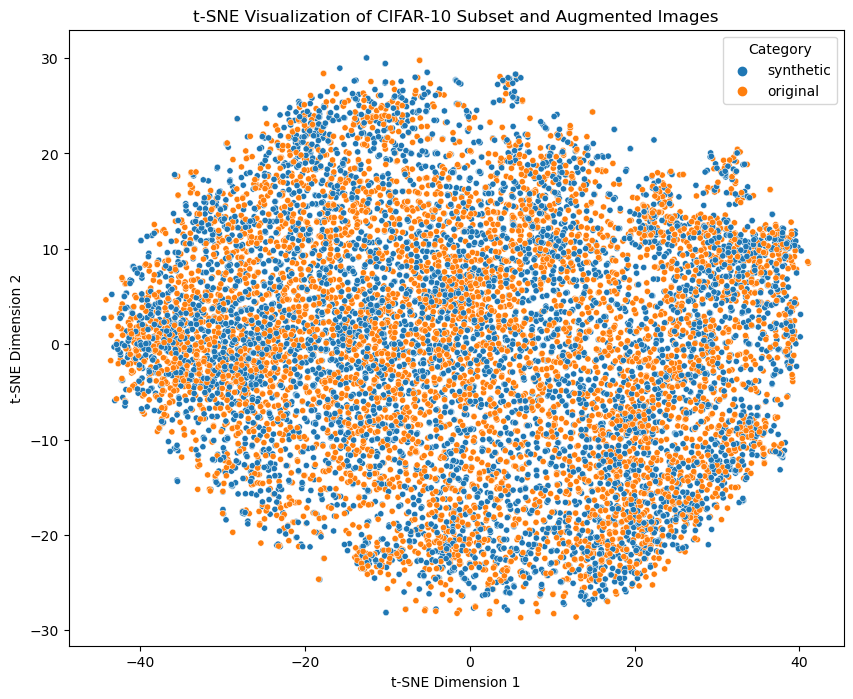

In [14]:
# Download CIFAR-10 dataset and select a subset of 5000 images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

cifar_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
subset_indices = torch.randperm(len(cifar_dataset))[:5000]
subset_dataset = torch.utils.data.Subset(cifar_dataset, subset_indices)

# Load the data and class labels for the original subset
data_loader_subset = torch.utils.data.DataLoader(subset_dataset, batch_size=64, shuffle=False)
X_subset = []
y_subset = []
for images, labels in data_loader_subset:
    X_subset.extend(images.view(images.size(0), -1))
    y_subset.extend(labels)

# Load your augmented images and labels (replace this with your augmented data loading)
# You should have X_augmented and y_augmented
data_path = 'data/cifar-10-ddpm'
data_path = 'data/cifar-10-GAN'
#1.
# get all the paths from train_data_path and append image paths and class to to respective lists
# eg. train path-> 'images/train/26.Pont_du_Gard/4321ee6695c23c7b.jpg'
# eg. class -> 26.Pont_du_Gard
image_paths = [] #to store image paths in list
classes = [] #to store class values
for i_data_path in glob.glob(data_path + '/*'):
    if (os.path.isdir(i_data_path) and i_data_path.split('/')[-1] != 'batch_previews'):
        classes.append(i_data_path.split('/')[-1]) 
        image_paths.append(glob.glob(i_data_path + '/*'))
image_paths = list(flatten(image_paths))

print('image_path example: ', image_paths[0])
print('class example: ', classes[0])

print("data size: {}".format(len(image_paths)))

#######################################################
#      Create dictionary for class indexes
#######################################################
idx_to_class = {i:j for i, j in enumerate(classes)}
class_to_idx = {value:key for key,value in idx_to_class.items()}

#######################################################
#               Define Dataset Class
#######################################################
class SyntheticCifarDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, transform=False):
        self.image_paths = image_paths
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        # image = cv2.imread(image_filepath)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image=Image.open(image_filepath)

        label = image_filepath.split('/')[-2]
        label = class_to_idx[label]
        if self.transform is not None:
            image = self.transform(img=image)#["image"]
        
        return image, label

#######################################################
#                  Create Dataset
#######################################################
full_trainset = SyntheticCifarDataset(image_paths, transform)
#######################################################
#                  Define Dataloader
#######################################################
full_trainloader = torch.utils.data.DataLoader(
    full_trainset, batch_size=100, shuffle=True, num_workers=2)

# Add augmented images to dataset
for images, labels in full_trainloader:
    X_subset.extend(images.view(images.size(0), -1))
    y_subset.extend(labels)
X_subset = torch.stack(X_subset)
y_subset = np.array(y_subset)
z = np.concatenate((np.full(5000, "original"), np.full(5120, "synthetic"))) # track augmented or subset

# Shuffle the indices
seed = 0
np.random.seed(seed)

# Create a random permutation index
permutation = np.random.permutation(len(X_subset))

# Shuffle X_subset, y_subset, and z using the same permutation index
X_subset = X_subset[permutation]
y_subset = y_subset[permutation]
z = z[permutation]

# Perform PCA
n_components = 50  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_subset)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=100, n_iter=5000, random_state=0)
X_tsne = tsne.fit_transform(X_pca)

# Create a Seaborn scatter plot
plt.figure(figsize=(10, 8))
# Separate the data points for the original subset and augmented images
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=z, palette="tab10", marker='o', s=20)
plt.title('t-SNE Visualization of CIFAR-10 Subset and Augmented Images')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Category')
plt.show()

